# Bericht der Gruppe 1

## Gliederung

* Einleitung
    * Aufgabenstellung (Kevin)
    * Welche Tools (Hannes)
    * QTable (Hannes)
    * QNN (Kevin)
* Umsetzung
    * Aufbau (Klassendiagramm, Sequenz, ...) (Hannes)
    * Umsetzung QTable (Hannes)
    * Umsetzung QNN (Kevin)
* Auswertung
    * Resultate (beide)
    * Lernerfolg (beide)
    * Fazit (beide)

![](docs/gitlabdown.jpg)

![](docs/gitlabdown_311221.png)

## 1. Einleitung
---
### 1.1 Aufgabenstellung

Die Aufgabe war es eine KI für ein beliebiges Brettspiel zu implementieren. Die Vorgabe für diese Aufgabe waren bereits generalisierte Klassen für zwei beliebige Spiele (bisher ohne KI), eine Klasse für das Environment bzw. das "Brett" und eine Klasse für die Spiellogik. Das bisher vorgegebene Environment war ein Tic Tac Toe Spiel mit einem 3x3 Brett und 2 Spielern. Dieses Spiel soll auch für die nachfolgenden Aufgaben beibehalten werden. Es wird somit nur eine KI für ein Tic Tac Toe Spiel erstellt.

Der komplette Entwicklungsprozess für diese Aufgabe soll nach der Standardpraxis für objektorientiertes Programmieren in Python entsprechen. Darunter zählt die Verwendung von generalisierten und spezialisierten Klassen, logischen Klassenkonstellationen, festgelegte Zugriffsbereiche für Methoden und Variablen sowie der Einhaltung sämtlich weiterer Prinzipien des Softwareengineerings während der Entwurfs- und Umsetzungsphase. Womit unter anderem das Entwickeln von wartbarer, konsistenter, modularer, erweiterbarer und verständlicher Software gemeint ist.

Was die KI betrifft sollen zwei wesentliche Ansätze durchgeführt werden. Die Basis für das Lernen soll ausschließlich bestärkend sein, damit verfallen jegliche Eingriffe durch einen Menschen während des Lernens. Die KI soll eigenständig durch Bestrafungen und Belohnungen das Spiel erlernen und darin besser werden.

Zum einem soll ein maschineller Lernalgorithmus, der auf der Basis der Q-Funktion und der damit verbundenen Q-Tabelle aufbaut, implementiert werden. Dieser Ansatz soll nach dem "Brute Force" Prinzip alle möglichen Zustände des Spiels "erkunden" und die jeweiligen besten Züge in einer Tabelle speichern.

Der zweite Ansatz soll mittels einem künstlichen neuronalen Netzes das Spiel erlernen.

### 1.4 QNN (Q-Wertbasiertes Neuronales Netzwerk)

Für die Erweiterbarkeit unseres Codes ist uns aufgefallen, dass der Q-Algorithmus seine Grenzen bei Spielen mit einem beinahe unendlichen Zustandsraum aufweist. Spiele wie Schach oder Go haben einen derart riesigen Zustandsraum aller möglichen Züge, der ohne weitere Hilfe nicht einfach durch ausprobieren komplett erkundet werden kann. Um dem Prinzip des bestärkenden Lernens nahe zu kommen, müssen andere Methoden gefunden werden, um zukünftige Züge oder sogar Strategien bei unendlich wirkenden Zustandsräumen hervorzusagen. Hierfür soll ein neuronales Netzwerk mit mehreren Schichten zum Einsatz kommen.

Der Gedanke dahinter ist, dass man nicht mehr versucht alle Zustände zu erkunden und perfekt vorherzusagen, sondern eine Struktur oder sogar Strategie in gewissen Zügen zu erkennen. Der Fokus des neuronalen Netzes soll damit sein, Strukturen in zeitlich aufeinanderfolgender Züge zu erkennen und bei unbekannten Zuständen einen Schätzwert auf Basis bisher bekannter Strategien ausgeben.

Ein neuronales Netzwerk besteht zumeist aus Eingabevektoren, verschiedenste versteckte Schichten sowie Ausgabevektoren. Genauso wie die Q-Funktion, sollen dem QNN gewisse Parameter als Eingabevektoren mitgegeben werden. Dazu gehört der aktuelle Zustand des Bretts, die ausgewählte Aktion auf Basis vorheriger Werte aus dem QNN Modell und ggf. die Belohnung. Als Ausgabevektor soll, genauso wie bei der Q-Funktion, ein Q-Wert sein, der die maximale Belohnung des aktuellen Zustand-Aktion-Paares beschreibt.

Die Lerndaten erstellt der QNN Agent selbst, durch das explorative Erkunden mittels dem Explorationsfaktor namens "Theta". Anhand der explorierten Daten und erlangten Belohnungen wird das QNN selbst die besten Züge herausfinden.

![](docs/qnn_model.png)

### 2.3 Umsetzung QNN

Für die Umsetzung des neuronalen Netzes haben wir uns stark an dem Prinzip des Q-Algorithmus gehalten. Das Prinzip der temporalen Verbindung und der Aktion-Zustand-Paare sind mit in die Entscheidung über den Aufbau des Netzes eingeflossen.


Die obere Abbildung zeigt das von uns ausgewählte Modell des Netzes. Es gibt genau zwei Eingangsvektoren, ein Vektor um den aktuellen Zustand abzubilden und einer für die ausgewählte Aktion. Die Eingangswerte werden zuvor noch vorverarbeitet, sodass z.B. der Zustand des 3x3 Bretts und die Aktion eindimensionell dargestellt werden. Die Werte werden zudem noch über ein One-Hot-Encoding für die Aktivierungsfunktionen der Neuronen vereinfacht. Im Fall des Spielbretts wird ein Spieler mit einer positiven 1 versehen und der Gegner mit einer -1. Leere Felder werden mit 0 initialisiert. Damit die ausgewählte Aktion genau einem Feld der neun verfügbaren zugeschrieben werden kann, wird die Aktion mittels One-Hot als 1 dargestellt und die nicht ausgewählten Felder mit einer 0 versehen. Der Eingangsvektor hat somit folgendes Format:

1. Vektor (Zustand): [0, 0, 0, 1, 0, -1, 1, 0, -1]
2. Vektor (Aktion): [1, 0, 0, 0, 0, 0, 0, 0, 0]

In diesem Beispiel sah das aktuelle Feld folgendermaßen aus:
&ensp;

|   |   |   | 
|---|---|---|
| -  | - | - |
| x  | - | o | 
| x  | - | o | 

Und nach der ausgewählten Aktion:
&ensp;

|   |   |   | 
|---|---|---|
| x  | - | - |
| x  | - | o | 
| x  | - | o | 

Letzendlich wird ein Array der Größe 2x9 als Eingangsvektor genutzt. Um diesen im Netz jedoch noch mehr zu vereinfachen wird in der ersten Schicht des Netzes der zweidimensionale Eingangsvektor in einen 1x18 Vektor transformiert. Damit erhält der obige Array folgendes Format:

[0, 0, 0, 1, 0, -1, 1, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

Danach werden 9 Dense Layers als Hidden Layer angefügt. Die Anzahl ergab sich aus der Feldgröße des Bretts. Diese werden schließlich mit der ReLU Aktivierungsfunkion (rectified linear unit) versehen (s. Funktion unten).

$$f(x) = max(0,x)$$

Die ReLU Aktivierungsfunktion nochmal als Graph dargestellt:

![](docs/relu.png)

Die Entscheidung auf ReLU fiel deshalb, da wir während des Spielens die Züge aufzeichnen und ab einer gewissen Größe direkt an des Netz zum Lernen weitergeben. Damit wollten wir ein Online Lernen ermöglichen, indem das Netz die eben geführten Züge und erhaltenen Belohnungen direkt anlernt. Dabei entsteht eine sehr hohe Rechenlast, wenn neue Daten erneut gelernt werden müssen. Um diese Last zu vermeiden, haben wir uns dazu entschieden das Netz schmal und schnell zu machen. Gewichtungen werden somit schnell bestimmt und Ergebnisse aus einem Lernzyklus schnell ausgegeben. Der Nachteil dabei ist die geringe Genauigkeit. Aus diesem Grund muss der Lerndurchgang mehrere Male druchgelaufen werden, bis ein möglichst geringer Verlustwert erreicht wurde.

Der Ausgabevektor ist schließlich nur noch ein einziger Wert, nämlich der eigentliche Q-Wert für das angegebene Aktion-Zustand-Paar. Da wir festgestellt haben, dass der Q-Algorithmus eine schnelle Gewinnstrategie mittels hoher Belohnungswerte lernt, dachten wir uns, dass das neuronale Netz verhersagen muss ob gutes oder eher schlechtes Feedback erwartet wird. Demnach wird beim fitten des Modells als Zielvektor für das Training die jeweilige Belohnung angegeben. Im folgendem Beispiel wird dies besser verdeutlicht:

* Der Agent sieht einen aktuellen Zustand
* Eine beste Aktion wird mittels Vorhersage aus dem verfügbaren Modell ausgesucht oder eine zufällige Aktion
* Die Umgebung gibt dem Agenten Feedback (als Belohnung oder Bestrafung)
* der letzte Zustand und die ausgewählte Aktion wird nun als Eingabevektor für das Training zusammengestellt
* die erlangene Belohnung/Bestrafung wird als Zielvektor bestimmt
* der Agent lernt nun, dass diese Aktion auf dem letzten Zustand zu einer Belohnung oder Bestrafung geführt hat

Der Hintergedanke dabei ist, dass das neuronale Netz eine feste Bindung zwischen Aktion-Zustand-Paar und Feedback aufbaut, in der Hoffnung, dass gleichartige neue Zustände mit ähnlichen Feedback bestimmt werden können. Damit müssen in der Theorie nicht mehr alle Zustände erlernt werden, sondern nur noch jene die strukturelle Unterschiede vorweisen. Die restlichen können mittels Schätzungen möglichst genau beschrieben werden, ähnlich nach dem Prinzip der linearen Regression.


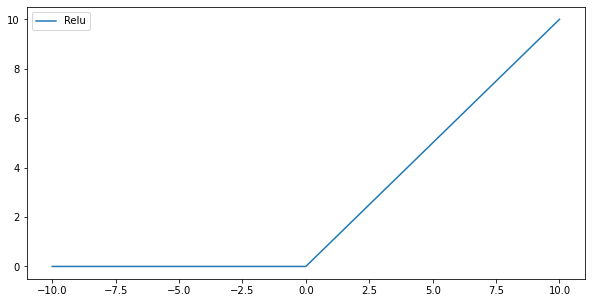

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-10, 10, 1000)
y = np.maximum(0, x)

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.legend(['Relu'])
plt.show()